# CRSP -- some case studies with time series data

&copy; **Johannes Ruf** (comments welcome under j.ruf@lse.ac.uk, February 2023)

 * CRSP = Center for Research in Security Prices
 * Contains prices and other information about US-traded assets.
 * Standard / classical academic and industry ressource for US-focused research on asset prices. 
 * Time series begins December 31, 1925.
 * Two primary identifiers: `permno` and `permco`. A company (`permco`) can have multiple securities (`permno`) at the same time.

In this notebook, we do two case studies and a number of exercises to get more familiar with this dataset.

## Case Study: Google and cooperate actions

In this part, we look at the stock prices of Google/Alphabet. It's a company that changed names (from Google to Alphabet) and has two different securities publicly traded. The two price series also reflect some cooperate actions (e.g., stock splits) and we investigate how they are incorporated in the CRSP data.

In [68]:
import pandas as pd

import seaborn
seaborn.set()

import wrds
WRDS_LOGIN = 'xxx'    # update to your login info on CRSP

In [2]:
pd.set_option('display.max_columns', None)     #to display all columns of a dataframe.

In [3]:
db = wrds.Connection(wrds_username=WRDS_LOGIN)

Loading library list...
Done


Let's download information related to Google/Alphabet:

In [4]:
db.raw_sql("SELECT * FROM crsp.stocknames_v2 WHERE issuernm LIKE 'GOOGLE%%' or issuernm LIKE 'ALPHABET%%'")

,permno,permco,namedt,nameenddt,securitybegdt,securityenddt,hdrcusip,hdrcusip9,cusip,cusip9,ticker,issuernm,primaryexch,conditionaltype,tradingstatusflg,shareclass,sharetype,securitytype,securitysubtype,usincflg,issuertype,siccd
0,14542.0,45483.0,2014-04-03,2015-10-04,2014-04-03,2022-12-30,02079K10,02079K107,38259P70,38259P706,GOOG,GOOGLE INC,Q,RW,A,C,NS,EQTY,COM,Y,CORP,7375.0
1,14542.0,45483.0,2015-10-05,2022-12-30,2014-04-03,2022-12-30,02079K10,02079K107,02079K10,02079K107,GOOG,ALPHABET INC,Q,RW,A,C,NS,EQTY,COM,Y,CORP,7375.0
2,90319.0,45483.0,2004-08-19,2014-04-02,2004-08-19,2022-12-30,02079K30,02079K305,38259P50,38259P508,GOOG,GOOGLE INC,Q,RW,A,A,NS,EQTY,COM,Y,CORP,7375.0
3,90319.0,45483.0,2014-04-03,2015-10-04,2004-08-19,2022-12-30,02079K30,02079K305,38259P50,38259P508,GOOGL,GOOGLE INC,Q,RW,A,A,NS,EQTY,COM,Y,CORP,7375.0
4,90319.0,45483.0,2015-10-05,2022-12-30,2004-08-19,2022-12-30,02079K30,02079K305,02079K30,02079K305,GOOGL,ALPHABET INC,Q,RW,A,A,NS,EQTY,COM,Y,CORP,7375.0


We observe all entries have the same `permco`, but different `permno`s. Indeed, they correspond to different share classes. Beginning 2014-04-03, the Class A security, GOOGL, has one vote per share, while the Class C security, GOOG, has no voting rights.  

Let's read in the prices from the CRSP daily stock files. We already encountered one of the relevant tables (namely, `dsf_v2`), in the previous notebook:

In [5]:
google = db.raw_sql("SELECT * FROM crsp.dsf_v2 WHERE permco = 45483", date_cols='dlycaldt')

In [6]:
google.head()

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlycaldt,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
0,14542.0,02079K10,45483.0,7375.0,74070.0,20140403.0,2014-04-03,N,569.74,TR,1.921340e+08,BP,NaN,NS,None,NaN,MP,NaN,NaN,NaN,NS,MR,0.0,0.0,1.0,NO,5088230.0,569.74,564.13,587.28,569.47,569.74,569.85,67036.0,0.0,2.898968e+09,NaN,NaN,None,337231.0
1,14542.0,02079K10,45483.0,7375.0,74070.0,20140404.0,2014-04-04,N,543.14,TR,1.831636e+08,BP,569.74,TR,2014-04-03,1.921340e+08,PB,-0.046688,-0.046688,0.0,NA,D1,0.0,0.0,1.0,NO,6377958.0,543.14,543.00,577.77,543.14,543.53,574.65,83271.0,39.0,3.464124e+09,NaN,NaN,None,337231.0
2,14542.0,02079K10,45483.0,7375.0,74070.0,20140407.0,2014-04-07,N,538.15,TR,1.814809e+08,BP,543.14,TR,2014-04-04,1.831636e+08,PB,-0.009187,-0.009187,0.0,NA,D3,0.0,0.0,1.0,NO,4389669.0,538.15,527.15,548.48,538.15,538.47,540.74,60169.0,41.0,2.362300e+09,NaN,NaN,None,337231.0
3,14542.0,02079K10,45483.0,7375.0,74070.0,20140408.0,2014-04-08,N,554.90,TR,1.871295e+08,BP,538.15,TR,2014-04-07,1.814809e+08,PB,0.031125,0.031125,0.0,NA,D1,0.0,0.0,1.0,NO,3152419.0,554.90,541.61,555.00,554.80,554.92,542.60,45392.0,43.0,1.749277e+09,NaN,NaN,None,337231.0
4,14542.0,02079K10,45483.0,7375.0,74070.0,20140409.0,2014-04-09,N,564.14,TR,1.902455e+08,BP,554.90,TR,2014-04-08,1.871295e+08,PB,0.016652,0.016652,0.0,NA,D1,0.0,0.0,1.0,NO,3324742.0,564.14,552.95,565.37,564.04,564.27,559.62,43319.0,44.0,1.875620e+09,NaN,NaN,None,337231.0


The original table from CRSP is called `StkDlySecurityData`. However, this table does not contain the `permco` column, so would access it as follows:

In [7]:
google = db.raw_sql("""
            SELECT * FROM crsp.StkDlySecurityData WHERE permno IN (14542, 90319)
            """, date_cols='dlycaldt')

In [8]:
google.head()

,permno,yyyymmdd,dlycaldt,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol
0,14542.0,20140403.0,2014-04-03,N,569.74,TR,1.921340e+08,BP,NaN,NS,None,NaN,MP,NaN,NaN,NaN,NS,MR,0.0,0.0,1.0,NO,5088230.0,569.74,564.13,587.28,569.47,569.74,569.85,67036.0,0.0,2.898968e+09
1,14542.0,20140404.0,2014-04-04,N,543.14,TR,1.831636e+08,BP,569.74,TR,2014-04-03,1.921340e+08,PB,-0.046688,-0.046688,0.0,NA,D1,0.0,0.0,1.0,NO,6377958.0,543.14,543.00,577.77,543.14,543.53,574.65,83271.0,39.0,3.464124e+09
2,14542.0,20140407.0,2014-04-07,N,538.15,TR,1.814809e+08,BP,543.14,TR,2014-04-04,1.831636e+08,PB,-0.009187,-0.009187,0.0,NA,D3,0.0,0.0,1.0,NO,4389669.0,538.15,527.15,548.48,538.15,538.47,540.74,60169.0,41.0,2.362300e+09
3,14542.0,20140408.0,2014-04-08,N,554.90,TR,1.871295e+08,BP,538.15,TR,2014-04-07,1.814809e+08,PB,0.031125,0.031125,0.0,NA,D1,0.0,0.0,1.0,NO,3152419.0,554.90,541.61,555.00,554.80,554.92,542.60,45392.0,43.0,1.749277e+09
4,14542.0,20140409.0,2014-04-09,N,564.14,TR,1.902455e+08,BP,554.90,TR,2014-04-08,1.871295e+08,PB,0.016652,0.016652,0.0,NA,D1,0.0,0.0,1.0,NO,3324742.0,564.14,552.95,565.37,564.04,564.27,559.62,43319.0,44.0,1.875620e+09


We see that `StkDlySecurityData` has fewer columns than `dsf_v2`. We will see in the next notebook where the additional information can be found in the original CRSP tables in case `dsf_v2` is not available.

Yet another relevant table provided by CRSP is `StkDlySecurityPrimaryData`, which contains a subset of important columns of `StkDlySecurityData`:

In [9]:
google = db.raw_sql("""
            SELECT * FROM crsp.StkDlySecurityPrimaryData WHERE permno IN (14542, 90319)
            """, date_cols='dlycaldt')

In [10]:
google.head()

,permno,dlycaldt,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyret,dlyretx,dlyretmissflg,dlydistretflg,dlyvol
0,14542.0,2014-04-03,N,569.74,TR,1.921340e+08,BP,NaN,NaN,NS,NO,5088230.0
1,14542.0,2014-04-04,N,543.14,TR,1.831636e+08,BP,-0.046688,-0.046688,NA,NO,6377958.0
2,14542.0,2014-04-07,N,538.15,TR,1.814809e+08,BP,-0.009187,-0.009187,NA,NO,4389669.0
3,14542.0,2014-04-08,N,554.90,TR,1.871295e+08,BP,0.031125,0.031125,NA,NO,3152419.0
4,14542.0,2014-04-09,N,564.14,TR,1.902455e+08,BP,0.016652,0.016652,NA,NO,3324742.0


Let's look at the price data of the two securities associated to Google/Alphabet:

In [11]:
google_pivoted = google.pivot(index='dlycaldt', columns='permno', values='dlyprc')

In [12]:
google_pivoted.head()

permno,14542.0,90319.0
dlycaldt,,
2004-08-19,NaN,100.335
2004-08-20,NaN,108.310
2004-08-23,NaN,109.400
2004-08-24,NaN,104.870
2004-08-25,NaN,106.000


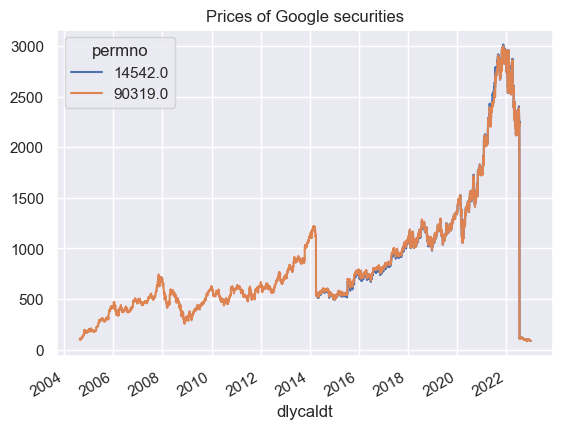

In [13]:
google_pivoted.plot(title='Prices of Google securities');

In 2022 (as in 2014), we see a big downward movement, which is related to a stock split. (More about this in the next notebooks.)

Let's look at the difference in price of the two securities:

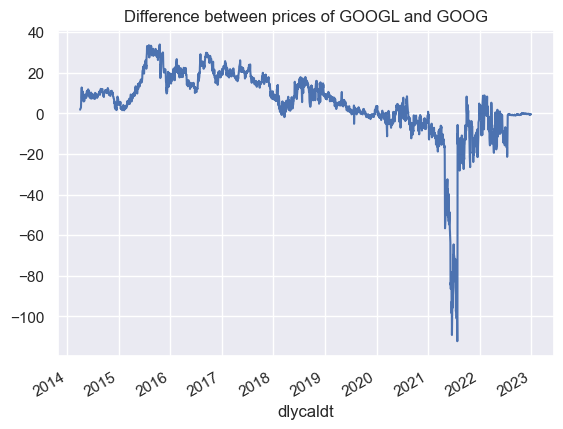

In [14]:
(google_pivoted[90319] - google_pivoted[14542]).plot(
    title='Difference between prices of GOOGL and GOOG');

We make a few observations:
 1. The shares with voting rights tend to be more expensive after the split.
 2. The 'price of a voting right' has been decreasing since 2016.  We need to be careful with the comparison after the stock split in July 2022 (as we now compare smaller stakes in the company).
 3. In contrast to Yahoo Finance **close** prices, CRSP has not adjusted for the stock split. Hence when evaluating the performance of trading strategies we need to be cautious.

These stock splits are events categorized in CRSP as 'distributions'. In the next notebook we will see how and where CRSP collects the relevant information. To avoid technicalities here (namely having to merge various tables), we notice that the WRDS table `dsf_v2` already contains the relevant information in the columns `disfacpr`, `disfacshr`, `disexdt`.  Hence, let us load `dsf_v2` and look more closely at those columns:

In [15]:
google = db.raw_sql("SELECT * FROM crsp.dsf_v2 WHERE permco = 45483", date_cols='dlycaldt')

In [16]:
google.head()

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlycaldt,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
0,14542.0,02079K10,45483.0,7375.0,74070.0,20140403.0,2014-04-03,N,569.74,TR,1.921340e+08,BP,NaN,NS,None,NaN,MP,NaN,NaN,NaN,NS,MR,0.0,0.0,1.0,NO,5088230.0,569.74,564.13,587.28,569.47,569.74,569.85,67036.0,0.0,2.898968e+09,NaN,NaN,None,337231.0
1,14542.0,02079K10,45483.0,7375.0,74070.0,20140404.0,2014-04-04,N,543.14,TR,1.831636e+08,BP,569.74,TR,2014-04-03,1.921340e+08,PB,-0.046688,-0.046688,0.0,NA,D1,0.0,0.0,1.0,NO,6377958.0,543.14,543.00,577.77,543.14,543.53,574.65,83271.0,39.0,3.464124e+09,NaN,NaN,None,337231.0
2,14542.0,02079K10,45483.0,7375.0,74070.0,20140407.0,2014-04-07,N,538.15,TR,1.814809e+08,BP,543.14,TR,2014-04-04,1.831636e+08,PB,-0.009187,-0.009187,0.0,NA,D3,0.0,0.0,1.0,NO,4389669.0,538.15,527.15,548.48,538.15,538.47,540.74,60169.0,41.0,2.362300e+09,NaN,NaN,None,337231.0
3,14542.0,02079K10,45483.0,7375.0,74070.0,20140408.0,2014-04-08,N,554.90,TR,1.871295e+08,BP,538.15,TR,2014-04-07,1.814809e+08,PB,0.031125,0.031125,0.0,NA,D1,0.0,0.0,1.0,NO,3152419.0,554.90,541.61,555.00,554.80,554.92,542.60,45392.0,43.0,1.749277e+09,NaN,NaN,None,337231.0
4,14542.0,02079K10,45483.0,7375.0,74070.0,20140409.0,2014-04-09,N,564.14,TR,1.902455e+08,BP,554.90,TR,2014-04-08,1.871295e+08,PB,0.016652,0.016652,0.0,NA,D1,0.0,0.0,1.0,NO,3324742.0,564.14,552.95,565.37,564.04,564.27,559.62,43319.0,44.0,1.875620e+09,NaN,NaN,None,337231.0


In [17]:
google[google['disexdt'].notnull()]

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlycaldt,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
266,14542.0,02079K10,45483.0,7375.0,74070.0,20150424.0,2015-04-24,N,565.06,TR,1.930765e+08,BP,547.00,TR,2015-04-23,1.869055e+08,PB,0.033016,0.033016,0.0,NA,D1,0.0,0.0,1.0,NO,4919031.0,565.06,557.25,571.14,565.06,565.25,566.10,53801.0,50.0,2.779548e+09,0.002746,0.002746,2015-04-27,341692.0
2085,14542.0,02079K10,45483.0,7375.0,74070.0,20220715.0,2022-07-15,N,2255.34,TR,7.067694e+08,BP,2228.80,TR,2022-07-14,6.984524e+08,PB,0.011908,0.011908,0.0,NA,D1,0.0,0.0,1.0,NO,1704785.0,2255.34,2236.45,2280.01,2254.72,2255.33,2259.26,76592.0,53.0,3.844870e+09,19.000000,19.000000,2022-07-18,313376.0
4624,90319.0,02079K30,45483.0,7375.0,44290.0,20140402.0,2014-04-02,N,1135.10,TR,3.195954e+08,BP,1134.89,TR,2014-04-01,3.195362e+08,PB,0.000185,0.000185,0.0,NA,D1,0.0,0.0,1.0,NO,2088804.0,1135.10,1124.00,1144.80,1135.10,1135.46,1141.90,32172.0,59.0,2.371001e+09,0.996900,0.000000,2014-04-03,281557.0
6710,90319.0,02079K30,45483.0,7375.0,44290.0,20220715.0,2022-07-15,N,2235.55,TR,6.723730e+08,BP,2207.35,TR,2022-07-14,6.638914e+08,PB,0.012776,0.012776,0.0,NA,D1,0.0,0.0,1.0,NO,2321973.0,2235.55,2218.00,2262.81,2235.77,2235.78,2240.01,121942.0,56.0,5.190887e+09,19.000000,19.000000,2022-07-18,300764.0


Why are there four (instead of three) entries?

If we search online, we get the following information for the second split in 2015: 

*On March 24, 2015, Google Inc. announced that holders of Google Inc. Class C Capital Stock (GOOG) will receive an Adjustment Payment related to the April 3, 2014 distribution of Google Inc. Class C Common Shares. The Adjustment Payment will be made as a stock distribution of Google Inc. (GOOG) Class C Common Shares. The distribution ratio is 0.0027455 of a GOOG share for each GOOG share held. The record date is April 2, 2015; the payable date is May 4, 2015. The NASDAQ Stock Market has set April 27, 2015, as the ex-distribution date for this distribution. Cash will be paid in lieu of fractional shares.*

Let's inspect the distribution events in 2014 and 2015. First, let's generate two dataframes for each of the two share classes:

In [18]:
classA = google[google['permno']==90319].set_index('dlycaldt')     # with voting right, Ticker today: Googl
classC = google[google['permno']==14542].set_index('dlycaldt')     # no voting right, Ticker today: Goog

Let's first look at the first stock split in 2014. The new security (Class C) has the following information when issued:

In [19]:
classC.iloc[:3]

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
dlycaldt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-03,14542.0,02079K10,45483.0,7375.0,74070.0,20140403.0,N,569.74,TR,1.921340e+08,BP,NaN,NS,None,NaN,MP,NaN,NaN,NaN,NS,MR,0.0,0.0,1.0,NO,5088230.0,569.74,564.13,587.28,569.47,569.74,569.85,67036.0,0.0,2.898968e+09,NaN,NaN,None,337231.0
2014-04-04,14542.0,02079K10,45483.0,7375.0,74070.0,20140404.0,N,543.14,TR,1.831636e+08,BP,569.74,TR,2014-04-03,1.921340e+08,PB,-0.046688,-0.046688,0.0,NA,D1,0.0,0.0,1.0,NO,6377958.0,543.14,543.00,577.77,543.14,543.53,574.65,83271.0,39.0,3.464124e+09,NaN,NaN,None,337231.0
2014-04-07,14542.0,02079K10,45483.0,7375.0,74070.0,20140407.0,N,538.15,TR,1.814809e+08,BP,543.14,TR,2014-04-04,1.831636e+08,PB,-0.009187,-0.009187,0.0,NA,D3,0.0,0.0,1.0,NO,4389669.0,538.15,527.15,548.48,538.15,538.47,540.74,60169.0,41.0,2.362300e+09,NaN,NaN,None,337231.0


The original security (Class A) has the following information during this time window:

In [20]:
classA.loc['April 2014'].head()

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
dlycaldt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-01,90319.0,02079K30,45483.0,7375.0,44290.0,20140401.0,N,1134.89,TR,3.195362e+08,BP,1114.51,TR,2014-03-31,3.137981e+08,PB,0.018286,0.018286,0.0,NA,D1,0.0,0.0,1.0000,NO,2185001.0,1134.89,1118.000,1137.5000,1134.67,1134.89,1120.27,31614.0,60.0,2.479736e+09,NaN,NaN,None,281557.0
2014-04-02,90319.0,02079K30,45483.0,7375.0,44290.0,20140402.0,N,1135.10,TR,3.195954e+08,BP,1134.89,TR,2014-04-01,3.195362e+08,PB,0.000185,0.000185,0.0,NA,D1,0.0,0.0,1.0000,NO,2088804.0,1135.10,1124.000,1144.8000,1135.10,1135.46,1141.90,32172.0,59.0,2.371001e+09,0.9969,0.0,2014-04-03,281557.0
2014-04-03,90319.0,02079K30,45483.0,7375.0,44290.0,20140403.0,N,571.50,TR,1.609098e+08,BP,1135.10,TR,2014-04-02,3.195954e+08,PB,0.005399,0.005399,0.0,NA,D1,0.0,0.0,1.9969,P1,4019647.0,571.50,566.010,588.3000,571.30,571.51,573.39,54405.0,58.0,2.297228e+09,NaN,NaN,None,281557.0
2014-04-04,90319.0,02079K30,45483.0,7375.0,44290.0,20140404.0,N,545.25,TR,1.535190e+08,BP,571.50,TR,2014-04-03,1.609098e+08,PB,-0.045932,-0.045932,0.0,NA,D1,0.0,0.0,1.0000,NO,5366972.0,545.25,544.494,579.7173,545.25,545.27,578.55,72239.0,59.0,2.926341e+09,NaN,NaN,None,281557.0
2014-04-07,90319.0,02079K30,45483.0,7375.0,44290.0,20140407.0,N,540.63,TR,1.522182e+08,BP,545.25,TR,2014-04-04,1.535190e+08,PB,-0.008473,-0.008473,0.0,NA,D3,0.0,0.0,1.0000,NO,3961552.0,540.63,530.530,549.8500,540.63,540.75,544.79,58224.0,59.0,2.141734e+09,NaN,NaN,None,281557.0


The `dlyprc` column contains the end-of-day security prices. If we compute the ratio of prices on the first trading day of the Class C security we get:

In [21]:
classC.loc['3 April 2014']['dlyprc'] / classA.loc['3 April 2014']['dlyprc']

0.9969203849518811

Hence, one Class C security was worth exactly 0.9969 Class A securities on the first trading day of the Class C security.  This explains the corresponding entry in the `disfacpr` column of the Class A security. Namely, a holder on April 2nd of a Class A security gets an addtional Class C security on April 3rd, which is worth 0.9969 times the price of a Class C security.

The column `dlyret` gives the total stock return over the day. Looking at April 3, 2014 for the Class A security, we see the retun equals 0.5399%, while the stock price goes down from 1135.1 (`dlyprevprc`) on the day before to 571.50 (`dlyprc`). Indeed, the return on CRSP takes into consideration the distribution event. The following computation confirms this return:

In [22]:
571.5 * (1 + 0.9969)  / 1135.1 - 1

0.0053989516342174415

Let's now look at the second distribution event in 2015, which only concerns the Class C stock. 

In [23]:
classC.loc['April 2015'].iloc[-6:-2]

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
dlycaldt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-23,14542.0,02079K10,45483.0,7375.0,74070.0,20150423.0,N,547.00,TR,1.869055e+08,BP,539.365,TR,2015-04-22,1.842751e+08,PB,0.014156,0.014156,0.0,NA,D1,0.0,0.0,1.000000,NO,4173376.0,547.00,540.2300,550.96,547.00,547.01,541.00,47024.0,49.0,2.282837e+09,NaN,NaN,None,341692.0
2015-04-24,14542.0,02079K10,45483.0,7375.0,74070.0,20150424.0,N,565.06,TR,1.930765e+08,BP,547.000,TR,2015-04-23,1.869055e+08,PB,0.033016,0.033016,0.0,NA,D1,0.0,0.0,1.000000,NO,4919031.0,565.06,557.2500,571.14,565.06,565.25,566.10,53801.0,50.0,2.779548e+09,0.002746,0.002746,2015-04-27,341692.0
2015-04-27,14542.0,02079K10,45483.0,7375.0,74070.0,20150427.0,N,555.37,TR,1.902864e+08,BP,565.060,TR,2015-04-24,1.930765e+08,PB,-0.014450,-0.014450,0.0,NA,D3,0.0,0.0,1.002746,S1,2398039.0,555.37,553.2001,565.95,555.37,555.47,563.39,31609.0,50.0,1.331799e+09,NaN,NaN,None,342630.0
2015-04-28,14542.0,02079K10,45483.0,7375.0,74070.0,20150428.0,N,553.68,TR,1.897074e+08,BP,555.370,TR,2015-04-27,1.902864e+08,PB,-0.003043,-0.003043,0.0,NA,D1,0.0,0.0,1.000000,NO,1490983.0,553.68,550.3660,556.02,553.68,553.69,554.64,21615.0,50.0,8.255275e+08,NaN,NaN,None,342630.0


For the second distribution event, recall that the ex-date was April 27, 2015. That means, whoever owned the security at the end of the trading day before (April 24, 2015 here) profits from the distribution. In this case, for each share owned, the investor received 0.0027455 of a new share (see columns `disfacpr` [used for the return computation] and `disfacshr`).

If we compute the return on April 27, we get:

In [24]:
555.37 * (1 + 0.0027455)  / 565.06 - 1

-0.014450202925352817

This is exactly the number in the `dlyret` column.

Note that there is another related column, namely `shrout`, the number of outstanding shares (in 1000s). This number also increases on April 27 by the same factor:

In [25]:
341692.0 * (1 + 0.0027455)

342630.115386

However, note that the number of outstanding shares changes often (e.g., share buybacks, etc). To see this, let's only plot `shrout` until 2021:

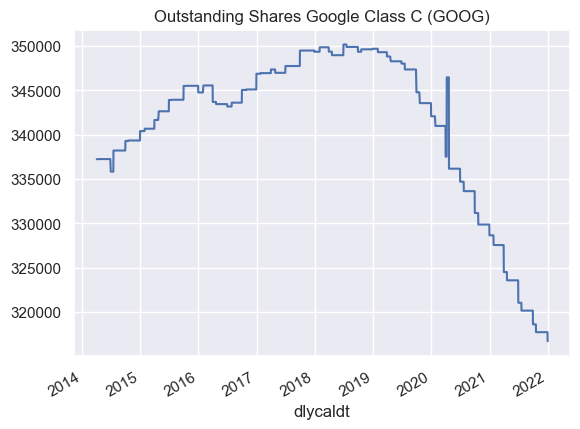

In [26]:
classC['shrout'].loc[:'2021'].plot(title='Outstanding Shares Google Class C (GOOG)');

After mentioning `shrout` we should also mention `dlycap` (total market capitalization), the product of `dlyprc` and `shrout`:

In [27]:
max(abs(classC['shrout'] * classC['dlyprc'] - classC['dlycap']))

1.1920928955078125e-07

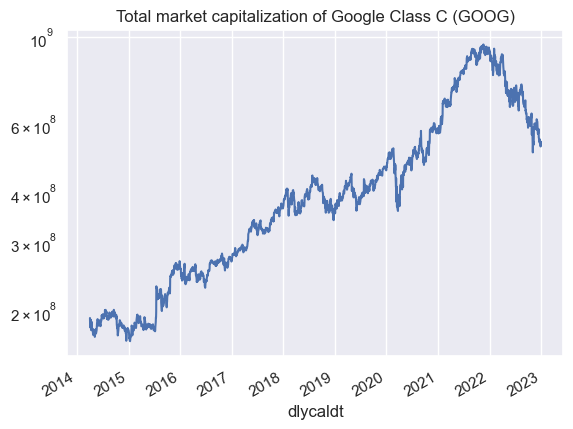

In [28]:
classC['dlycap'].plot(logy=True, title='Total market capitalization of Google Class C (GOOG)');

Let's reflect on what we have seen so far. We worked with two tables: `stocknames_v2` and `dsf_v2`. In the latter, we now should understand at least the meaning of the following columns:
`permno`, `permco`, `dlycaldt`, `dlyprc`, `dlyprevprc`, `dlyprevdt`, `dlyret`, `disfacpr`, `disexdt`, `shrout`, and `dlycap`.

### Legacy data: adjustment factors

In the legacy data format of CRSP (before July 2022), there were two important additional columns, namely `cfacpr` and `cfacshr`. Those two columns could be used as cumulative adjustment factors. Unfortunately, with the new data format these columns are not provided anymore (at least, as of February 2023). 

As they were frequently used, let's briefly look at these legacy features.

In [29]:
google_legacy = db.raw_sql("SELECT * FROM crsp.dsf WHERE permco = '45483'", date_cols='date')   
#note the different name for the date column

In [30]:
google_legacy.head()

,cusip,permno,permco,issuno,hexcd,hsiccd,date,bidlo,askhi,prc,vol,ret,bid,ask,shrout,cfacpr,cfacshr,openprc,numtrd,retx
0,02079K10,14542.0,45483.0,74070.0,3.0,7375.0,2014-04-03,564.130005,587.280029,569.739990,5088230.0,NaN,569.469971,569.739990,337231.0,20.054911,20.054911,569.849976,67036.0,NaN
1,02079K10,14542.0,45483.0,74070.0,3.0,7375.0,2014-04-04,543.000000,577.770020,543.140015,6377958.0,-0.046688,543.140015,543.530029,337231.0,20.054911,20.054911,574.650024,83271.0,-0.046688
2,02079K10,14542.0,45483.0,74070.0,3.0,7375.0,2014-04-07,527.150024,548.479980,538.150024,4389669.0,-0.009187,538.150024,538.469971,337231.0,20.054911,20.054911,540.739990,60169.0,-0.009187
3,02079K10,14542.0,45483.0,74070.0,3.0,7375.0,2014-04-08,541.609985,555.000000,554.900024,3152419.0,0.031125,554.799988,554.919983,337231.0,20.054911,20.054911,542.599976,45392.0,0.031125
4,02079K10,14542.0,45483.0,74070.0,3.0,7375.0,2014-04-09,552.950012,565.369995,564.140015,3324742.0,0.016652,564.039978,564.270020,337231.0,20.054911,20.054911,559.619995,43319.0,0.016652


There are several differences in the selection and naming of columns (e.g. `dlyprc` was called `prc`; there was no information on previous trading days).

Let's now look at the adjustment factors:

In [31]:
legacy_pivoted = google_legacy.pivot(index='date', columns='permno', values=['prc', 'cfacpr', 'shrout', 'cfacshr'])
legacy_pivoted.head()

prc              cfacpr          shrout          cfacshr  \
permno     14542.0     90319.0 14542.0 90319.0 14542.0  90319.0 14542.0   
date                                                                      
2004-08-19     NaN  100.334999     NaN  39.938     NaN  33603.0     NaN   
2004-08-20     NaN  108.309998     NaN  39.938     NaN  33603.0     NaN   
2004-08-23     NaN  109.400002     NaN  39.938     NaN  33603.0     NaN   
2004-08-24     NaN  104.870003     NaN  39.938     NaN  33603.0     NaN   
2004-08-25     NaN  106.000000     NaN  39.938     NaN  33603.0     NaN   

                    
permno     90319.0  
date                
2004-08-19    20.0  
2004-08-20    20.0  
2004-08-23    20.0  
2004-08-24    20.0  
2004-08-25    20.0

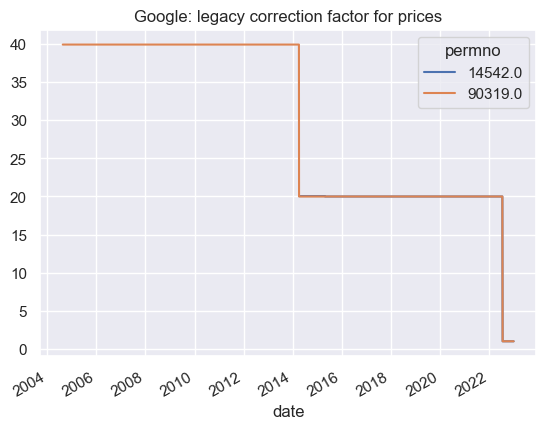

In [32]:
legacy_pivoted['cfacpr'].plot(title='Google: legacy correction factor for prices');

Each of the distribution events corresponds to a jump in the above plot.

We could then plot the adjusted prices as follows.

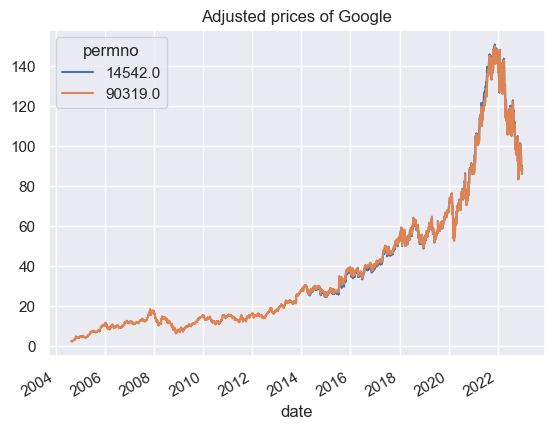

In [33]:
(legacy_pivoted['prc'] / legacy_pivoted['cfacpr']).plot(title='Adjusted prices of Google');

Similarly, `cfacshr` was a correction factor for the number of outstanding shares.

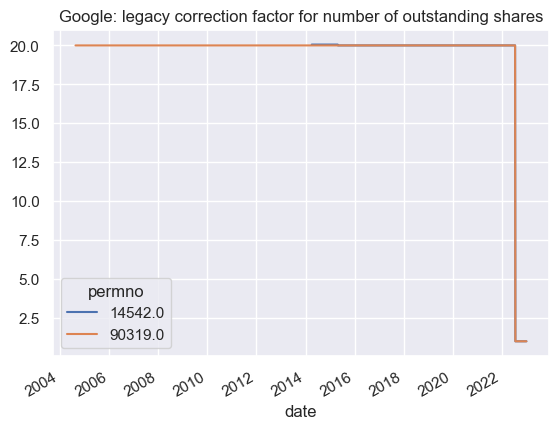

In [34]:
legacy_pivoted['cfacshr'].plot(title='Google: legacy correction factor for number of outstanding shares');

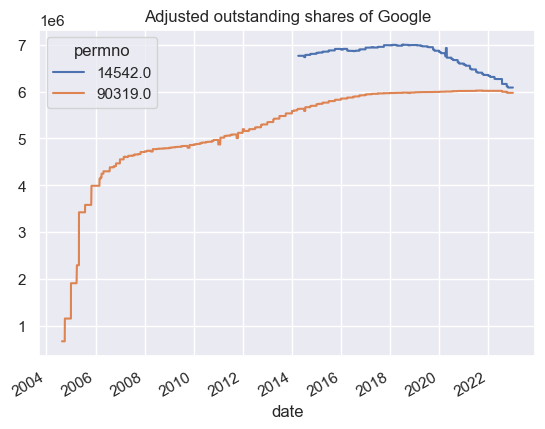

In [35]:
(legacy_pivoted['shrout'] * legacy_pivoted['cfacshr']).plot(title='Adjusted outstanding shares of Google');

### Creating ad-hoc adjustment factors 

Since the two columns `cfacpr` and `cfacshr` are not provided anymore, we can generate an ad-hoc cumulative adjustment factor from the daily information in `disfacpr` and `disfacshr` as follows:

In [36]:
classA['cfacpr_adhoc'] = classA['disfacpr'].fillna(0).add(1).iloc[::-1].cumprod().iloc[::-1]
classA['cfacshr_adhoc'] = classA['disfacshr'].fillna(0).add(1).iloc[::-1].cumprod().iloc[::-1]
classC['cfacpr_adhoc'] = classC['disfacpr'].fillna(0).add(1).iloc[::-1].cumprod().iloc[::-1]
classC['cfacshr_adhoc'] = classC['disfacshr'].fillna(0).add(1).iloc[::-1].cumprod().iloc[::-1]

This yields, in this case, the same values as the historical columns `cfacpr` and `cfacshr`. E.g.:

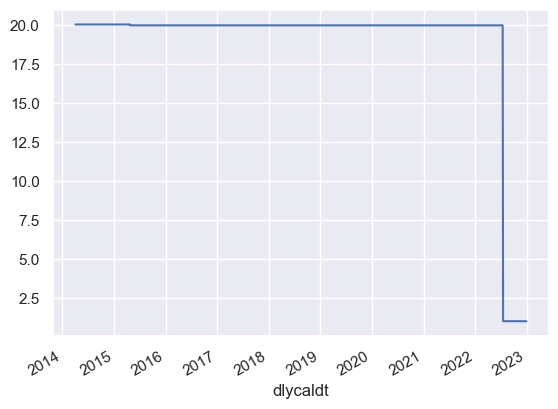

In [37]:
classC['cfacpr_adhoc'].plot();

### Trading volumes

Above, we have seen that Google Class A securities are cheaper than Class C securities recently, despite having voting rights. This might not immediately imply an arbitrage opportunity as there is no mechanism that forces the two price processes to converge. In the finance literature, there are several papers on *Limits of Arbitrage*.  A first idea might be that the Class A security is hardly traded and hence its price process doesn't reflect the true price. We can investigate this by considering the trading volume of Google securities.

In [38]:
google.head()

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlycaldt,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
0,14542.0,02079K10,45483.0,7375.0,74070.0,20140403.0,2014-04-03,N,569.74,TR,1.921340e+08,BP,NaN,NS,None,NaN,MP,NaN,NaN,NaN,NS,MR,0.0,0.0,1.0,NO,5088230.0,569.74,564.13,587.28,569.47,569.74,569.85,67036.0,0.0,2.898968e+09,NaN,NaN,None,337231.0
1,14542.0,02079K10,45483.0,7375.0,74070.0,20140404.0,2014-04-04,N,543.14,TR,1.831636e+08,BP,569.74,TR,2014-04-03,1.921340e+08,PB,-0.046688,-0.046688,0.0,NA,D1,0.0,0.0,1.0,NO,6377958.0,543.14,543.00,577.77,543.14,543.53,574.65,83271.0,39.0,3.464124e+09,NaN,NaN,None,337231.0
2,14542.0,02079K10,45483.0,7375.0,74070.0,20140407.0,2014-04-07,N,538.15,TR,1.814809e+08,BP,543.14,TR,2014-04-04,1.831636e+08,PB,-0.009187,-0.009187,0.0,NA,D3,0.0,0.0,1.0,NO,4389669.0,538.15,527.15,548.48,538.15,538.47,540.74,60169.0,41.0,2.362300e+09,NaN,NaN,None,337231.0
3,14542.0,02079K10,45483.0,7375.0,74070.0,20140408.0,2014-04-08,N,554.90,TR,1.871295e+08,BP,538.15,TR,2014-04-07,1.814809e+08,PB,0.031125,0.031125,0.0,NA,D1,0.0,0.0,1.0,NO,3152419.0,554.90,541.61,555.00,554.80,554.92,542.60,45392.0,43.0,1.749277e+09,NaN,NaN,None,337231.0
4,14542.0,02079K10,45483.0,7375.0,74070.0,20140409.0,2014-04-09,N,564.14,TR,1.902455e+08,BP,554.90,TR,2014-04-08,1.871295e+08,PB,0.016652,0.016652,0.0,NA,D1,0.0,0.0,1.0,NO,3324742.0,564.14,552.95,565.37,564.04,564.27,559.62,43319.0,44.0,1.875620e+09,NaN,NaN,None,337231.0


In [39]:
google_vol_pivoted = google.pivot(index='dlycaldt', columns='permno', values=['dlyvol', 'dlyprcvol'])

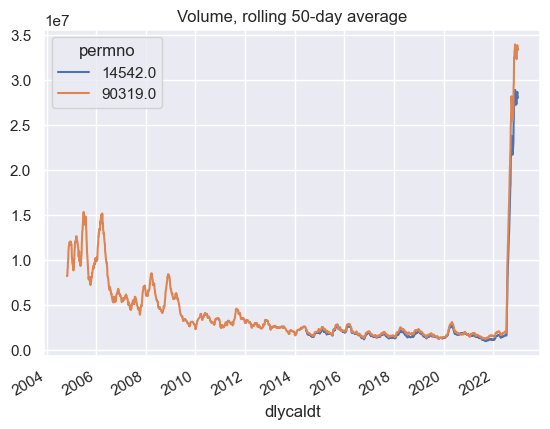

In [40]:
google_vol_pivoted['dlyvol'].rolling(50).mean().plot(title='Volume, rolling 50-day average');

There doesn't seem to be a clear difference between Class A and C securities.  However, the trading volume seems to be going down over time (at least until the stock split in July 2022).  Why?  Indeed, `dlyvol` is the total raw number of shares of a stock traded on a day, and the share price of Google has been going up over time. Hence, it might be better to consider `dlyprcvol` (price times volume, i.e., numbers of dollars exchanged by trading Google securities.)

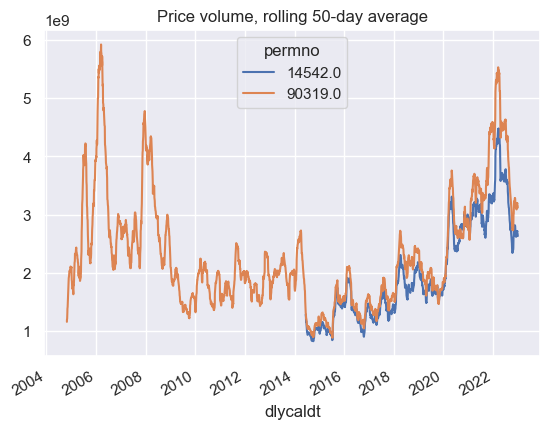

In [41]:
google_vol_pivoted['dlyprcvol'].rolling(50).mean().plot(title='Price volume, rolling 50-day average');

This looks more stable. Over long time horizones it's usually recomendable to look at the price volume instead of the raw volume.

## Case Study: IBM and missing price observations

In this part of the notebook, we look at the price flag `dlyprcflg` and do an exercise to get a list of companies that don't have trading prices on a certain date.

Let's first look at IBM data to investigate how certain missing price observations are handled in CRSP.

Let's fetch its price data via a join operation:

In [42]:
ibm = db.raw_sql("""
    SELECT DISTINCT s.* FROM crsp.StkDlySecurityData AS s 
    JOIN crsp.stocknames_v2 AS n
    ON s.permno = n.permno
    WHERE n.issuernm LIKE 'INTERNATIONAL BUSINESS M%%'
    """, date_cols='dlycaldt').set_index('dlycaldt')

Alternatively, similarly to above for Google, we could figure out the `permno` of IBM (namely 12490), and then simplify the SQL query as follows.

In [43]:
ibm = db.raw_sql("SELECT * FROM crsp.StkDlySecurityData WHERE permno = 12490", 
                 date_cols='dlycaldt').set_index('dlycaldt')

We now focus on the price flag, contained in `dlyprcflag`.

In [44]:
ibm['dlyprcflg'].value_counts()   # for percentages use: ibm['dlyprcflg'].value_counts(normalize=True)

TR    23956
BA     1576
MP       17
Name: dlyprcflg, dtype: int64

Here, the price flag `dlyprcflg` takes three different values. `MP` stands for 'missing price'.  There are 17 trading days without a price observation.  `TR` stands for 'Closing Trade' and means the prices are from the closing. `BA` stands for 'Bid/Ask Average'. When the flag is set to `BA`, then no closing price was observed, and CRSP takes the average of the best bid and ask. This is quite different from the legacy dataset, where prices were noted as negative when they were computed as bid/ask averages, triggering a common source of coding errors (more precisely: in the legacy data, bid/ask averages had dashes placed in front of them, which were interpreted as negative prices).  
In general, we should be cautious if we notice price flags different from `TR`.

General hint for flags: To understand the different values a flag can take, this [CRSP documentation](https://www.crsp.org/files/FlagValueTables.pdf) is very helpful. Searching this document for `dlyprcflg` and clicking on the corresponding hyperlink yields this [list](https://www.crsp.org/files/appendix/FlagType_PC.html) of possible flag values and their interpretations.

I actually don't know why on certain days we don't have trade observations (for the August 1955 date below, Hurricane Connie might have played a role). Let's look at the last date.

In [45]:
ibm[ibm['dlyprcflg']=='BA'].tail()

,permno,yyyymmdd,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol
dlycaldt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1954-08-20,12490.0,19540820.0,N,291.00,BA,1192518.0,BP,293.0,TR,1954-08-19,1200714.0,PB,-0.006826,-0.006826,0.0,NA,D1,0.0,0.0,1.0,NO,0.0,NaN,NaN,NaN,289.0,293.0,NaN,None,None,0.0
1955-06-01,12490.0,19550601.0,N,418.00,BA,1712964.0,BP,418.0,TR,1955-05-31,1712964.0,PB,0.000000,0.000000,0.0,NA,D1,0.0,0.0,1.0,NO,0.0,NaN,NaN,NaN,417.0,419.0,NaN,None,None,0.0
1955-07-26,12490.0,19550726.0,N,424.25,BA,1738576.5,BP,423.0,TR,1955-07-25,1733454.0,PB,0.002955,0.002955,0.0,NA,D1,0.0,0.0,1.0,NO,0.0,NaN,NaN,NaN,422.5,426.0,NaN,None,None,0.0
1955-07-29,12490.0,19550729.0,N,421.50,BA,1727307.0,BP,422.0,TR,1955-07-28,1729356.0,PB,-0.001185,-0.001185,0.0,NA,D1,0.0,0.0,1.0,NO,0.0,NaN,NaN,NaN,420.0,423.0,NaN,None,None,0.0
1955-08-15,12490.0,19550815.0,N,410.00,BA,1680180.0,BP,413.0,TR,1955-08-12,1692474.0,PB,-0.007264,-0.007264,0.0,NA,D3,0.0,0.0,1.0,NO,0.0,NaN,NaN,NaN,407.0,413.0,NaN,None,None,0.0


Let's look at all stocks that were in the database on August 15, 1955. As an exercise, let's print out all company names that have bid-ask averages only on this date.

In [46]:
all_on_19550815 = db.raw_sql("""
                    SELECT * FROM crsp.StkDlySecurityData WHERE yyyymmdd = 19550815
                    """, date_cols='dlycaldt')

Among these securities, here is a summary of the price flags:

In [47]:
all_on_19550815['dlyprcflg'].value_counts()

TR    932
BA    123
NT      3
MP      2
Name: dlyprcflg, dtype: int64

We see a new value, namely 'NT' for non-traded.

In [48]:
set_permnos = set(all_on_19550815[all_on_19550815['dlyprcflg']=='BA']['permno'])

In [49]:
all_names = db.raw_sql("""
    SELECT permno, issuernm FROM crsp.stocknames_v2
    WHERE nameenddt >= '19550815' AND namedt <= '19550815'
    """)

In [50]:
len(all_names)

1080

In [51]:
len(all_on_19550815)

1060

There are some duplications (potentially a data error -- I could not figure out why these duplications exist), so let's drop the duplicated values.

In [52]:
all_names = all_names.drop_duplicates(subset='permno')

In [53]:
len(all_names.drop_duplicates())

1060

In [54]:
all_names[all_names['permno'].isin(set_permnos)]

,permno,issuernm
13,10209.0,AMERICAN AGRIC CHEM CO
21,10313.0,AMERICAN INTERNATIONAL CORP
28,10460.0,AMERICAN MACH & METALS INC
34,10532.0,ARNOLD CONSTABLE CORP
40,10639.0,ATLAS TACK CORP
...,...,...
1035,25259.0,GOODALL SANFORD INC
1052,25435.0,PARK & TILFORD DISTILLERS CORP
1056,25486.0,NEW YORK SHIPBUILDING CORP
1063,25566.0,DEVOE & RAYNOLDS CO


This is the list of all companies that only provide bid-ask averages on August 15th, 1955.

IBM (and other time series) also missing returns as seen above.  One such example is January 27, 1975:

In [55]:
ibm.loc['1975-01-24':].head(4)

,permno,yyyymmdd,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol
dlycaldt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1975-01-24,12490.0,19750124.0,N,162.875,TR,23651730.25,BP,163.000,TR,1975-01-23,23669882.00,PB,-0.000767,-0.000767,0.0,NA,D1,0.0,0.0,1.0,NO,63100.0,162.875,162.000,164.625,NaN,NaN,NaN,None,None,10277412.5
1975-01-27,12490.0,19750127.0,N,NaN,MP,NaN,MP,NaN,NA,None,NaN,NA,NaN,NaN,NaN,MP,MR,0.0,0.0,1.0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN
1975-01-28,12490.0,19750128.0,N,179.750,TR,26102216.50,BP,162.875,TR,1975-01-24,23651730.25,PB,0.103607,0.103607,0.0,NA,P1,0.0,0.0,1.0,NO,285900.0,179.750,179.250,188.000,NaN,NaN,NaN,None,None,51390525.0
1975-01-29,12490.0,19750129.0,N,187.250,TR,27191321.50,BP,179.750,TR,1975-01-28,26102216.50,PB,0.041725,0.041725,0.0,NA,D1,0.0,0.0,1.0,NO,212800.0,187.250,179.625,188.000,NaN,NaN,NaN,None,None,39846800.0


**Warning:** Recall the flag `dlyprcflg` with the CRSP [explanations](https://www.crsp.org/files/appendix/FlagType_PC.html) of the possible flag values. It turns out, the CRSP documentation is incomplete and does not contain all values as we show now.

In [56]:
%%time

prcflg_counts = db.raw_sql("SELECT dlyprcflg, COUNT(*) AS nobs FROM crsp.StkDlySecurityData GROUP BY dlyprcflg")

CPU times: user 4.38 ms, sys: 4.8 ms, total: 9.18 ms
Wall time: 35.2 s


In [57]:
prcflg_counts.sort_values(by='nobs')

,dlyprcflg,nobs
2,DM,1801
3,DP,8368
1,DA,17300
7,SU,19561
4,HA,23628
5,MP,414885
6,NT,1374296
0,BA,17451184
8,TR,83621759


The flag values `HA` and `SU` are not explained in the CRSP documentation.

## Exercises

 1. How is the Google stock split from July 2022 reflected in the data? In particular, interpret the two columns `disfacpr` and `disfacshr` in the `dsf_v2` table.
 
 2. Choose a US traded stock of your liking and do a similar analysis as we have done for Google and IBM above.

 3. Have a look at the [legacy documentation](http://www.crsp.org/products/documentation/crsp-us-stock-and-index-databases-data-descriptions-guide). There is also the mapping to the new data format provided [here](https://www.crsp.org/files/CRSP_Cross_Reference_Guide.pdf).   There is no need to read this carefully but get an idea of the available documentation. 

## Project

How many trading days are in CRSP? How many trading days are there each year?  How many trading days does an average year have? Why did the numbers change by over time? What happened in 1968? 

### A solution

In [58]:
%%time

days = db.raw_sql("SELECT DISTINCT dlycaldt FROM crsp.StkDlySecurityData", date_cols='dlycaldt')

CPU times: user 156 ms, sys: 338 ms, total: 494 ms
Wall time: 1min 34s


In [59]:
print('In total, there are {} trading days in CRSP.'.format(len(days)))

In total, there are 25549 trading days in CRSP.


In [60]:
days['year'] = days['dlycaldt'].dt.year

In [61]:
days_per_year = days.groupby('year').count()

In [62]:
days_per_year = days_per_year.loc['1926':]

In [63]:
print('The number of trading days per year is in average {:.0f}.'.format(days_per_year.mean()[0]))

The number of trading days per year is in average 263.


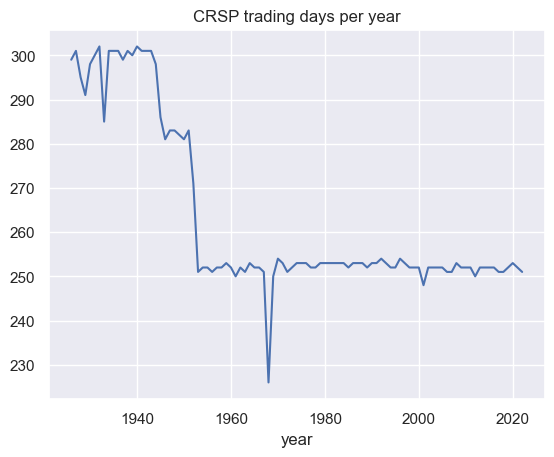

In [64]:
days_per_year.plot(title='CRSP trading days per year', legend=False);

Saturdays were trading days earlier on. In 1968, the [Paperwork Crisis](https://en.wikipedia.org/wiki/Depository_Trust_%26_Clearing_Corporation) caused exchanges to close on Wednesdays.  Also note the dip in 2001, when exchanges were closed for a few days due to the tragic events of September 11.

An alternative and shorter approach to the above project was suggested to me by Jun Cheng and relies on the following SQL query:

In [65]:
%%time

days_per_year = db.raw_sql("""SELECT CAST(EXTRACT(YEAR FROM dlycaldt) AS INTEGER) AS year, COUNT(DISTINCT dlycaldt) AS nobs
                     FROM crsp.dsf_v2 GROUP BY year
                   """).set_index('year').loc[1926:]

CPU times: user 6.41 ms, sys: 18.4 ms, total: 24.8 ms
Wall time: 1min 38s


And next, the same command to plot:

days_per_year.plot(title='CRSP trading days per year', legend=False);

In [66]:
db.close()

In [67]:
%reset -f